#### dataset
- imagenet-new.zip
- https://mitu.co.in/dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os

In [4]:
path = r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\dataset\imagenet-new"

In [5]:
train_datagen = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = .2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [6]:
os.path.join(path, 'train')

'C:\\Users\\DAI.STUDENTSDC\\Desktop\\NLP_CV\\dataset\\imagenet-new\\train'

In [7]:
train = train_datagen.flow_from_directory(os.path.join(path, 'train'),
                                          target_size = (64, 64),
                                          class_mode = 'binary')

Found 5000 images belonging to 10 classes.


In [8]:
test = test_datagen.flow_from_directory(os.path.join(path, 'test'),
                                          target_size = (64, 64),
                                          class_mode = 'binary')

Found 10000 images belonging to 1 classes.


In [9]:
train.class_indices

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [10]:
# import gc
# del model
# gc.collect()
# gc.collect()

In [11]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (64, 64, 3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    # tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,882 (105.01 KB)

 Trainable params: 26,882 (105.01 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model.compile(optimizer = 'adam', loss = loss_fn , metrics = ['accuracy']) 

In [13]:
history = model.fit(train, epochs = 10,  batch_size = 10)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.1569 - loss: 2.2441
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.2817 - loss: 1.9945
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.3552 - loss: 1.8226
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.3935 - loss: 1.7284
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.3984 - loss: 1.6955
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.4370 - loss: 1.6586
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.4322 - loss: 1.6657
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.4596 - loss: 1.5696
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.4605 - loss: 1.5652
Epoch 10/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.4556 - loss: 1.5531


<Axes: >

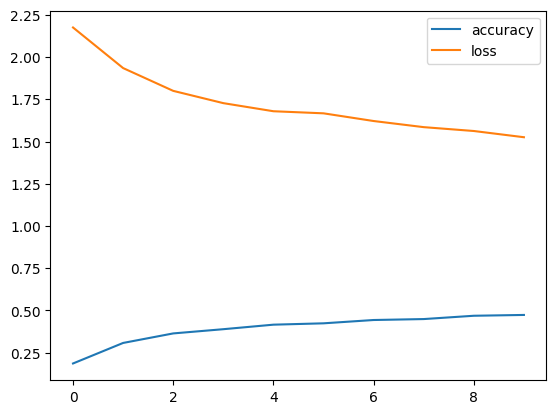

In [14]:
hist_df = pd.DataFrame(history.history)
hist_df.plot()

### prediction on new images

In [ ]:
res = dict((v,k) for k, v in train.class_indices.items())

In [ ]:
import cv2
img = cv2.imread(os.path.join(path, 'val','images', 'val_192.JPEG'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (64, 64))
img = img.reshape(1, 64, 64, 3)

pred = model.predict(img)[0]
print(res[pred.argmax()])